In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np

In [38]:
# option 1. dynamically download JSON
url = 'https://www.googleapis.com/webfonts/v1/webfonts?key='
key = 'your-key-here'
data = pd.read_json(url+key, orient='')

df = pd.json_normalize(data['items'])
df.head()

,family,variants,subsets,version,lastModified,category,kind,files.regular,files.italic,files.500,...,files.300,files.900,files.500italic,files.600italic,files.700italic,files.800italic,files.900italic,files.100italic,files.300italic,files.200italic
0,ABeeZee,"[regular, italic]",[latin],v14,2020-09-02,sans-serif,webfonts#webfont,http://fonts.gstatic.com/s/abeezee/v14/esDR31x...,http://fonts.gstatic.com/s/abeezee/v14/esDT31x...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abel,[regular],[latin],v12,2020-09-10,sans-serif,webfonts#webfont,http://fonts.gstatic.com/s/abel/v12/MwQ5bhbm2P...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abhaya Libre,"[regular, 500, 600, 700, 800]","[latin, latin-ext, sinhala]",v6,2020-09-02,serif,webfonts#webfont,http://fonts.gstatic.com/s/abhayalibre/v6/e3tm...,NaN,http://fonts.gstatic.com/s/abhayalibre/v6/e3t5...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abril Fatface,[regular],"[latin, latin-ext]",v12,2020-09-02,display,webfonts#webfont,http://fonts.gstatic.com/s/abrilfatface/v12/zO...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aclonica,[regular],[latin],v11,2020-09-02,sans-serif,webfonts#webfont,http://fonts.gstatic.com/s/aclonica/v11/K2FyfZ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.loc[df.family == 'Encode Sans']

,family,variants,subsets,version,lastModified,category,kind,files.regular,files.italic,files.500,...,files.300,files.900,files.500italic,files.600italic,files.700italic,files.800italic,files.900italic,files.100italic,files.300italic,files.200italic
322,Encode Sans,"[100, 200, 300, regular, 500, 600, 700, 800, 900]","[latin, latin-ext, vietnamese]",v8,2021-01-30,sans-serif,webfonts#webfont,http://fonts.gstatic.com/s/encodesans/v8/LDIca...,NaN,http://fonts.gstatic.com/s/encodesans/v8/LDIca...,...,http://fonts.gstatic.com/s/encodesans/v8/LDIca...,http://fonts.gstatic.com/s/encodesans/v8/LDIca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# select only the columns we need
cols = ['family', 'variants', 'subsets', 'category']
df = df[cols]
# df.head(5)

# Remove any space from family string so that it matchs with file name convention.
df.family = [name.replace(' ', '') for name in df.family]
df.head(5)

,family,variants,subsets,category
0,ABeeZee,"[regular, italic]",[latin],sans-serif
1,Abel,[regular],[latin],sans-serif
2,AbhayaLibre,"[regular, 500, 600, 700, 800]","[latin, latin-ext, sinhala]",serif
3,AbrilFatface,[regular],"[latin, latin-ext]",display
4,Aclonica,[regular],[latin],sans-serif


In [41]:
mlb = MultiLabelBinarizer()

# one-hot encoding + prefix
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('variants')),
                          columns=[x for x in mlb.classes_],
                          index=df.index))
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('subsets')),
                          columns=['subsets_' + x for x in mlb.classes_],
                          index=df.index))
df = df.join(pd.get_dummies(df['category'], prefix="category")).drop(['category'], axis=1)

df.head(5)

,family,100,100italic,200,200italic,300,300italic,500,500italic,600,...,subsets_wancho,subsets_warang-citi,subsets_yezidi,subsets_yi,subsets_zanabazar-square,category_display,category_handwriting,category_monospace,category_sans-serif,category_serif
0,ABeeZee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Abel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,AbhayaLibre,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,AbrilFatface,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Aclonica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
col_names = {
    "100": "Thin",
    "100italic": "ThinItalic",
    "200": "ExtraLight",
    "200italic": "ExtraLightItalic",
    "300": "Light",
    "300italic": "LightItalic",
    "400": "Regular",
    "regular": "Regular",
    "400italic": "Italic",
    "italic": "Italic",
    "500": "Medium",
    "500italic": "MediumItalic",
    "600": "SemiBold",
    "600italic": "SemiBoldItalic",
    "700": "Bold",
    "700italic": "BoldItalic",
    "800": "ExtraBold",
    "800italic": "ExtraBoldItalic",
    "900": "Black",
    "900italic": "BlackItalic"
}
col_names = {k:f'variants_{v}' for k, v in col_names.items()}

df = df.rename(col_names, axis='columns')

df.columns

Index(['family', 'variants_Thin', 'variants_ThinItalic', 'variants_ExtraLight',
       'variants_ExtraLightItalic', 'variants_Light', 'variants_LightItalic',
       'variants_Medium', 'variants_MediumItalic', 'variants_SemiBold',
       ...
       'subsets_wancho', 'subsets_warang-citi', 'subsets_yezidi', 'subsets_yi',
       'subsets_zanabazar-square', 'category_display', 'category_handwriting',
       'category_monospace', 'category_sans-serif', 'category_serif'],
      dtype='object', length=179)

In [43]:
df.to_csv('google-fonts-annotation.csv', index=False)

In [44]:
print(df.columns[df.columns.str.contains('chinese')])

Index(['subsets_chinese-hongkong', 'subsets_chinese-simplified',
       'subsets_chinese-traditional'],
      dtype='object')


In [45]:
print(df[df['subsets_chinese-hongkong'] == 1])

         family  variants_Thin  variants_ThinItalic  variants_ExtraLight  \
808  NotoSansHK              1                    0                    0   

     variants_ExtraLightItalic  variants_Light  variants_LightItalic  \
808                          0               1                     0   

     variants_Medium  variants_MediumItalic  variants_SemiBold  ...  \
808                1                      0                  0  ...   

     subsets_wancho  subsets_warang-citi  subsets_yezidi  subsets_yi  \
808               0                    0               0           0   

     subsets_zanabazar-square  category_display  category_handwriting  \
808                         0                 0                     0   

     category_monospace  category_sans-serif  category_serif  
808                   0                    1               0  

[1 rows x 179 columns]


In [46]:
from PIL import Image,ImageDraw,ImageFont
print('Number of fonts in each variant:')
print(df[df.filter(regex=r'^variants_', axis=1).columns].eq(1).sum().sort_values(ascending=False))

print('\nNumber of fonts in each subset:')
print(df[df.filter(regex=r'^subsets_', axis=1).columns].eq(1).sum().sort_values(ascending=False))

print('\nNumber of fonts in each category:')
print(df[df.filter(regex=r'^category_', axis=1).columns].eq(1).sum().sort_values(ascending=False))

Number of fonts in each variant:
variants_Regular             1352
variants_Bold                 526
variants_Medium               353
variants_SemiBold             329
variants_Light                321
variants_ExtraBold            229
variants_Italic               223
variants_ExtraLight           214
variants_Black                211
variants_BoldItalic           180
variants_Thin                 180
variants_MediumItalic         118
variants_SemiBoldItalic       115
variants_LightItalic          113
variants_ExtraBoldItalic       77
variants_ExtraLightItalic      77
variants_BlackItalic           72
variants_ThinItalic            58
dtype: int64

Number of fonts in each subset:
subsets_latin                     1179
subsets_latin-ext                  805
subsets_vietnamese                 333
subsets_cyrillic                   166
subsets_cyrillic-ext               115
                                  ... 
subsets_kaithi                       1
subsets_javanese                    

In [47]:
mask = (df.filter(regex='thin', axis=1).sum(axis=1).astype(bool) &
        df.filter(regex='regular', axis=1).sum(axis=1).astype(bool) & 
        df.filter(regex='thai', axis=1).sum(axis=1).astype(bool))
df_selected = df[mask]
df_selected

,family,variants_Thin,variants_ThinItalic,variants_ExtraLight,variants_ExtraLightItalic,variants_Light,variants_LightItalic,variants_Medium,variants_MediumItalic,variants_SemiBold,...,subsets_wancho,subsets_warang-citi,subsets_yezidi,subsets_yi,subsets_zanabazar-square,category_display,category_handwriting,category_monospace,category_sans-serif,category_serif


In [48]:
mask = (df.filter(regex='chinese', axis=1).sum(axis=1).astype(bool) & 
       df.filter(regex='sans-serif', axis=1).sum(axis=1).astype(bool))
df_selected = df[mask]
df_selected

,family,variants_Thin,variants_ThinItalic,variants_ExtraLight,variants_ExtraLightItalic,variants_Light,variants_LightItalic,variants_Medium,variants_MediumItalic,variants_SemiBold,...,subsets_wancho,subsets_warang-citi,subsets_yezidi,subsets_yi,subsets_zanabazar-square,category_display,category_handwriting,category_monospace,category_sans-serif,category_serif
808,NotoSansHK,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
879,NotoSansSC,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
894,NotoSansTC,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
regex_filters = ['_regular', '_japanese', '_serif']

df_new = pd.concat([df.filter(regex=regex, axis=1).sum(axis=1).astype(bool) for regex in regex_filters], axis=1)
mask = df_new.all(axis=1)

df.loc[mask]

,family,variants_Thin,variants_ThinItalic,variants_ExtraLight,variants_ExtraLightItalic,variants_Light,variants_LightItalic,variants_Medium,variants_MediumItalic,variants_SemiBold,...,subsets_wancho,subsets_warang-citi,subsets_yezidi,subsets_yi,subsets_zanabazar-square,category_display,category_handwriting,category_monospace,category_sans-serif,category_serif


In [50]:
import re

def filter_fonts(df, regex_filters):
    df_new = pd.concat([df.filter(regex=re.compile(regex, re.IGNORECASE), axis=1).sum(axis=1).astype(bool) for regex in regex_filters], axis=1)
    mask = df_new.all(axis=1)
    return list(df.loc[mask].family)

filtered_fontnames = filter_fonts(df, ['Black', 'cyrillic', '_serif'])
filtered_fontnames

['Alegreya',
 'AlegreyaSC',
 'Bitter',
 'Literata',
 'Merriweather',
 'NotoSerifDisplay',
 'Piazzolla',
 'PlayfairDisplay',
 'PlayfairDisplaySC',
 'RobotoSlab',
 'SourceSerifPro',
 'Vollkorn',
 'VollkornSC',
 'ZenOldMincho']

In [51]:
import glob

# change the root directory according to your setup
rds_dir = '/rds-d2/user/wjm41/hpc-work/datasets'
ROOT = rds_dir+'/fonts/ofl'

# some fonts are within /ofl/fontname/static directory (2 levels deep)
all_fonts_path = glob.glob(ROOT + '/**/**/**/*.ttf', recursive=True)
print('number of font files in total: ', len(all_fonts_path))

number of font files in total:  9822


In [2]:
def filter_fonts_get_paths(df, root='./', variants=['_'], subsets=['_'], category=''):
    # exceptions
    if not variants or variants == [''] or variants == '': variants = ['_']
    if not subsets or subsets == [''] or subsets == '': subsets = ['_']
    # apply filters
    regex_filters = variants + subsets + ['_'+category]
    df_new = pd.concat([df.filter(regex=re.compile(regex, re.IGNORECASE), axis=1).sum(axis=1).astype(bool) for regex in regex_filters], axis=1)
    mask = df_new.all(axis=1)
    filtered_fontnames = list(df.loc[mask].family)
    # construct file paths
    paths = []
    for fontname in filtered_fontnames:
        if variants == ['_']: # select all variants
            sel = glob.glob(f'{root}/{fontname.lower()}/**/**/**/*.ttf', recursive=True)
            paths.extend(sel)
        else:
            for variant in variants:
                sel = glob.glob(f'{root}/{fontname.lower()}/**/**/{fontname}-{variant}.ttf', recursive=True) 
                for path in sel:
                    paths.append(path)
    print(f'Found {len(paths)} font files.')
    return paths

# let's try the function
# paths = filter_fonts_get_paths(df, root=ROOT, subsets=['japanese'], variants=['_'], category='sans-serif')


Found 7 font files.
text w & h:  459 148
0 9 459 148


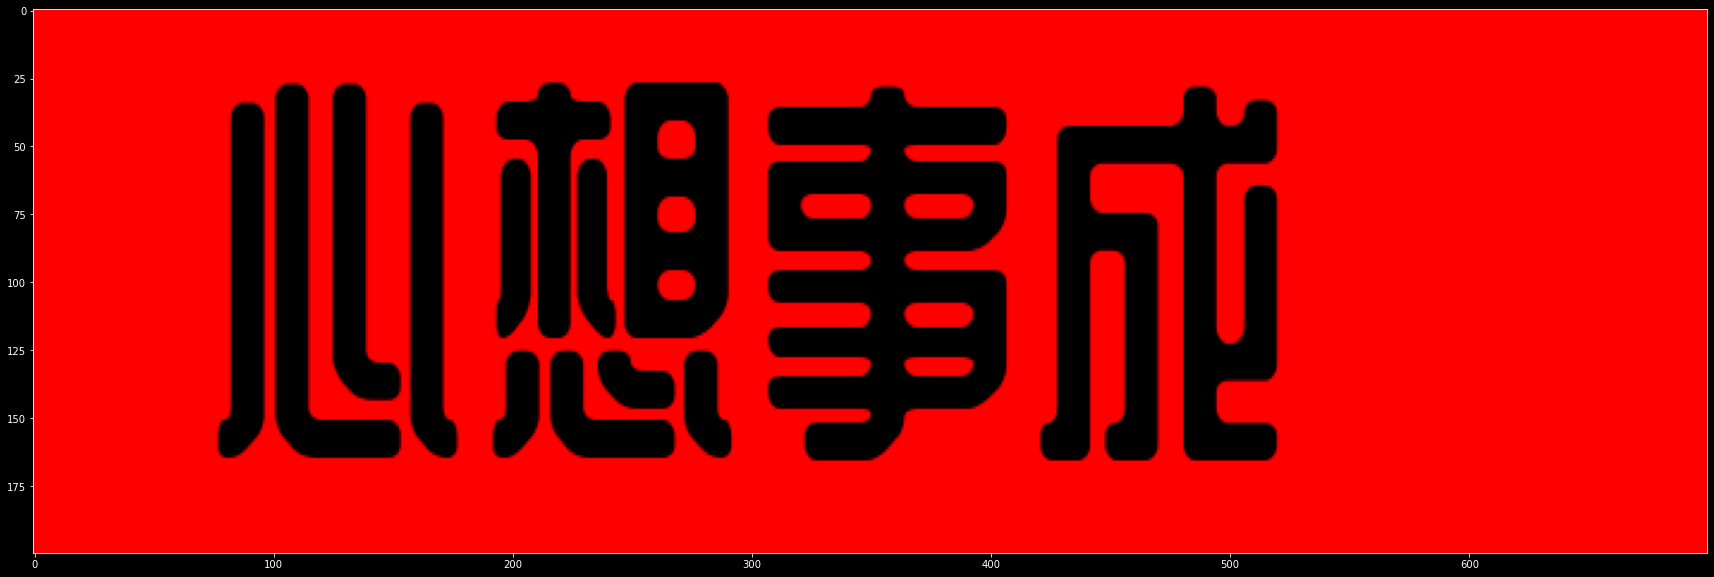

In [45]:
import random
import re
import glob
from PIL import Image,ImageDraw,ImageFont

IMG_WIDTH = 700
IMG_HEIGHT = 200

df = pd.read_csv('google-fonts-annotaion.csv')
rds_dir = '/rds-d2/user/wjm41/hpc-work/datasets'
ROOT = rds_dir+'/fonts/ofl'

paths = filter_fonts_get_paths(df, root=ROOT, subsets=['chinese-simplified'], variants=['_'], category='')
r = random.randrange(0, len(paths))

# sample text and font
text = "新年快樂"
text = "身體健康"
text = "心想事成"
text_size = 150
x = 300
y = 150
font = ImageFont.truetype(paths[r], text_size)

# # get text info (not being used but may be useful)
text_width, text_height = font.getsize(text)
left, top, right, bottom = font.getbbox(text)
print('text w & h: ', text_width, text_height)
print(left, top, right, bottom)

# create a blank canvas with extra space between lines
canvas = Image.new('RGB', (IMG_WIDTH, IMG_HEIGHT), "red")

# draw the text onto the text canvas
draw = ImageDraw.Draw(canvas)
draw.text((x, y), text, 'black', font, anchor='ms')

fig = plt.figure(figsize=(30,10))
plt.imshow(canvas, aspect='auto')